In [1]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import itertools
import time

In [2]:
class Onehot2Int(object):
    """To plot the decision boundary"""
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [3]:
model = Sequential()  

In [4]:
def theOriginalNN(X,Y):
    """
    The NN model which we will train and get the weights for the new
    NN model
    """    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    

    feature_vector_shape = len(X_train[0])
    input_shape = (feature_vector_shape,)
    print("Input shape",input_shape)
    print(f'Feature shape: {input_shape}')


    model.add(Dense(2,input_shape=input_shape, activation = 'relu'))
    #model.add(Dense(16, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(2, activation='softmax'))   
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
   

    print("Weights and biases of the layers before training the model: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

#     print(X_train.shape,Y_train.shape)
#     print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_tr = Y_train
    Y_train = to_categorical(Y_train)
#     print(Y_train.shape)
    Y_test = to_categorical(Y_test)
   
    e = 500   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=0)
    
    print("Weights and biases of the layers after training the model: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
        
    #predict
    pred = model.predict(X_train)
#    print("After Prediction of model", pred)
   
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    
    graph_it(Loss, Epoch, Accuracy, model,scores,X_train, X_test, Y_train, Y_test, Y_tt)

#     weights = model.layers[0].get_weights()[0]
#     biases = model.layers[0].get_weights()[1]
    
    
    




In [5]:
def graph_it(Loss, Epoch, Accuracy, model,scores,X_train, X_test, Y_train, Y_test,Y_tt):
    """
    Creating all the graphs:
    1. Loss vs Epoch
    2. Accuracy vs Epoch
    3. The decision boundarys
    """
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("The LOSS Graph")
    plt.show()
    
    plt.figure(figsize=(10,7))
    plt.plot(Epoch, Accuracy)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("The ACCURACY graph")
    plt.show()
    
    
    #print(f'Test results - Loss: {scores[0]} - Accuracy: {scores[1]*100}%')
    
    # Plot decision boundary
    keras_model_no_ohe = Onehot2Int(model)

    # Plot decision boundary
    
    plt.figure(figsize=(10,7))
    plot_decision_regions(X_test, Y_tt, clf=keras_model_no_ohe, legend=2)
    plt.show()
    
    

In [6]:
def theNewNN(X,Y):
    """
    The NN model which will be trained by the weights 
    we got by the OriginalNN()
    """
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    

#     feature_vector_shape = len(X_train[0])
#     input_shape = (feature_vector_shape,)
#     print("Input shape",input_shape)
#     print(f'Feature shape: {input_shape}')


#     model = Sequential()  
#     model.add(Dense(2,input_shape=input_shape, activation = 'relu'))
#     #model.add(Dense(16, activation = 'relu'))
#     model.add(Dense(4, activation = 'relu'))
#     model.add(Dense(2, activation='softmax')) 
    
    model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
    
    print(X_train.shape,Y_train.shape)
    print(X_test.shape, Y_test.shape)
    Y_tt = Y_test
    Y_train = to_categorical(Y_train)
    print(Y_train.shape)
    Y_test = to_categorical(Y_test)
    
    # Setting new weights and biases
    for layer in model.layers:
        a,b = layer.get_weights()[0].shape
        layer.set_weights([np.random.randn(a,b), np.ones(layer.get_weights()[1].shape)])
                
        
    print("Weights and biases of the layers after setting the new weights and biases: \n")
    for layer in model.layers:
        print(layer.name)
        print("Weights")
        print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
        print("Bias")
        print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
   
    e = 500   #The number of epochs
    obj = model.fit(X_train, Y_train, epochs = e, shuffle = True, verbose=0)
    
#     print("Weights and biases of the layers after setting the new weights and biases: \n")
#     for layer in model.layers:
#         print(layer.name)
#         print("Weights")
#         print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
#         print("Bias")
#         print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
    
    
    #predict
    pred = model.predict(X_train)
#    print("After Prediction of model", pred)
    
    scores = model.evaluate(X_test, Y_test)
    Loss = np.array(obj.history["loss"])
    Epoch = np.arange(e)
    Accuracy = np.array(obj.history["accuracy"])
    #print(Loss, Epoch, Accuracy)
    graph_it(Loss, Epoch, Accuracy, model,scores,X_train, X_test, Y_train, Y_test, Y_tt)


    



In [7]:
#Old Dataset
def OldDataset():
    """
    The dataset for the original model
    """
    #Class 1
    mean = [5,5]
    cov = [[10,0],
           [0,10]] 
    Class1 = np.random.multivariate_normal(mean,cov,1000)

    #Class 2
    mean = [-5,5]
    cov = [[10,0],
           [0,10]] 
    Class2 = np.random.multivariate_normal(mean,cov,1000)    
    

    X = np.vstack([Class1, Class2])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    theOriginalNN(X,Y)
    
    

In [8]:
#New Dataset
def NewDataset(m):
    """
    The dataset for the new model
    """
    #Class 3
    mean = [m,m]
    cov = [[10,0],
           [0,10]] 
    Class3 = np.random.multivariate_normal(mean,cov,1000)

    #Class 4
    mean = [(-m),m]
    cov = [[10,0],
           [0,10]] 
    Class4 = np.random.multivariate_normal(mean,cov,1000)
    
    X = np.vstack([Class3, Class4])

    # Y = np.array([0]*500 + [1]*500 + [2]*500)
    Y = np.array([0]*1000 + [1]*1000)
    #print(Y)

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='plasma', s=100, alpha=0.5)
    plt.show()
    
    
    
    theNewNN(X,Y)

****************************The Original NN*************************************


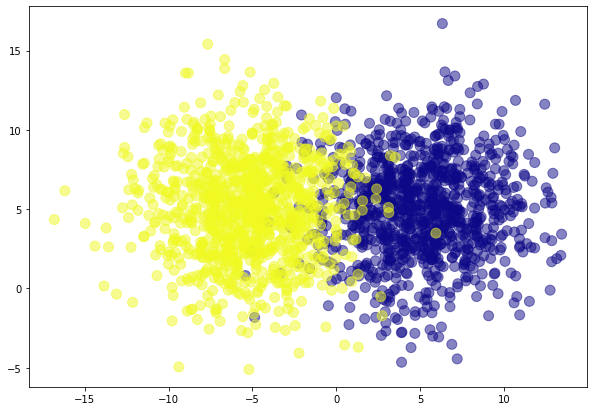

Input shape (2,)
Feature shape: (2,)
Weights and biases of the layers before training the model: 

dense
Weights
Shape:  (2, 2) 
 [[-0.43428105  0.04812658]
 [-1.0069873   0.92689717]]
Bias
Shape:  (2,) 
 [0. 0.] 

dense_1
Weights
Shape:  (2, 4) 
 [[ 0.07048678 -0.8475611  -0.22207308 -0.1837132 ]
 [ 0.63582563  0.3365624  -0.86058116 -0.11829567]]
Bias
Shape:  (4,) 
 [0. 0. 0. 0.] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.24861193 -0.6066532 ]
 [-0.6848345   0.43048668]
 [-0.52093196 -0.5467007 ]
 [ 0.34211326 -0.04033422]]
Bias
Shape:  (2,) 
 [0. 0.] 

Weights and biases of the layers after training the model: 

dense
Weights
Shape:  (2, 2) 
 [[-0.19166477  0.57050484]
 [-1.2130966   0.3567039 ]]
Bias
Shape:  (2,) 
 [-0.12201273 -0.03244662] 

dense_1
Weights
Shape:  (2, 4) 
 [[ 0.03471356 -0.7699188  -0.22207308 -0.1837132 ]
 [ 0.82985395  0.17964831 -0.86058116 -0.11829567]]
Bias
Shape:  (4,) 
 [-0.11884981  0.41676664  0.          0.        ] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.

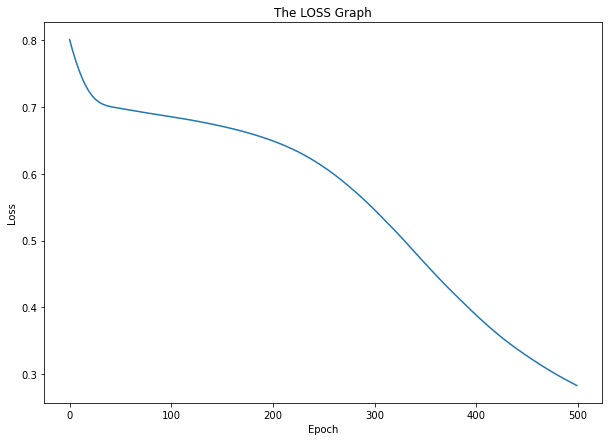

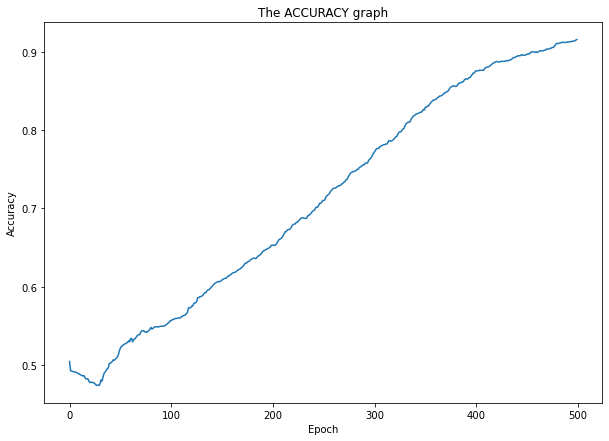

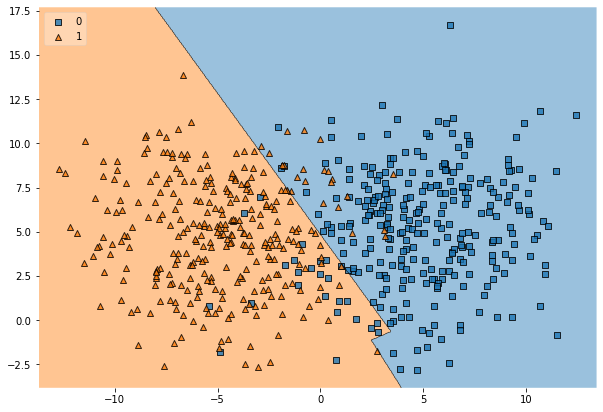


**************************The New NN************************************
-----------------------------------------------


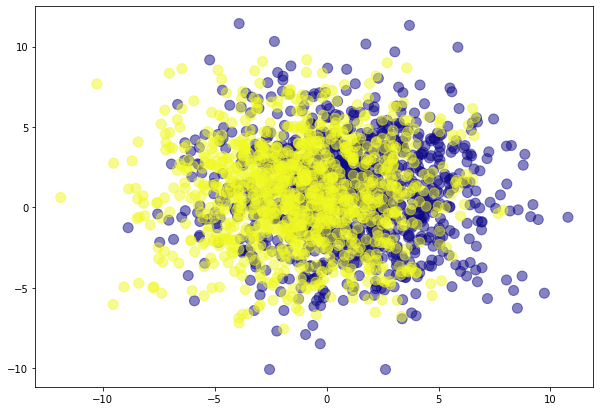

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 1.2815833  0.2983204]
 [ 1.4735559 -1.0422288]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.6857875  0.448902   0.5528092  1.4980667]
 [-1.8592643 -1.5748029 -2.1404467  0.9861773]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.49942684  0.7203918 ]
 [-0.8561051  -0.26890025]
 [ 0.35639706 -1.9506727 ]
 [-0.7068387  -0.1993561 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 682us/step - loss: 0.6844 - accuracy: 0.5400


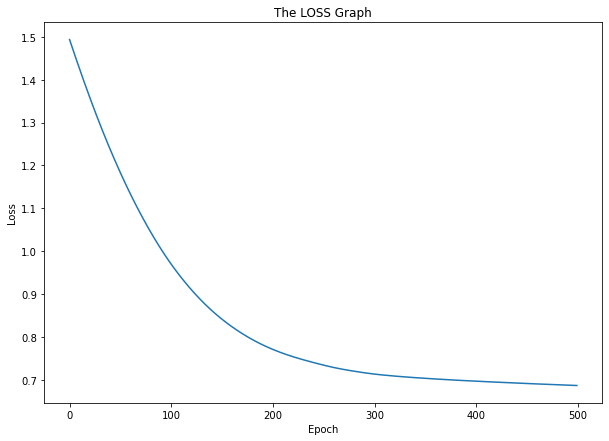

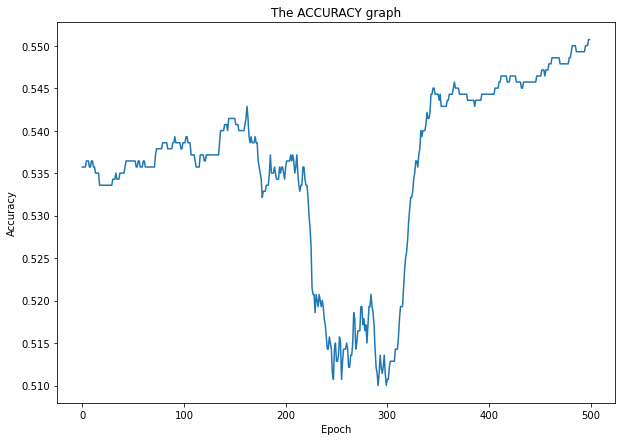

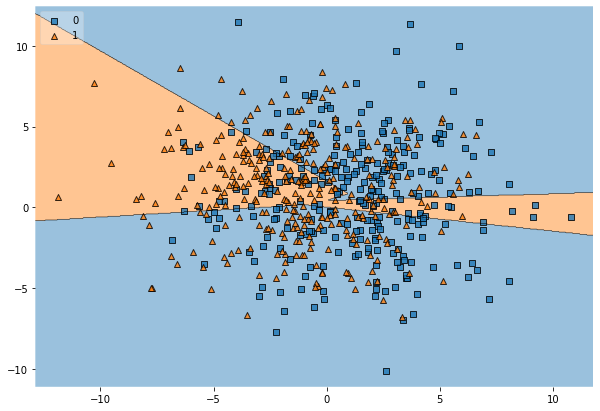

-----------------------------------------------


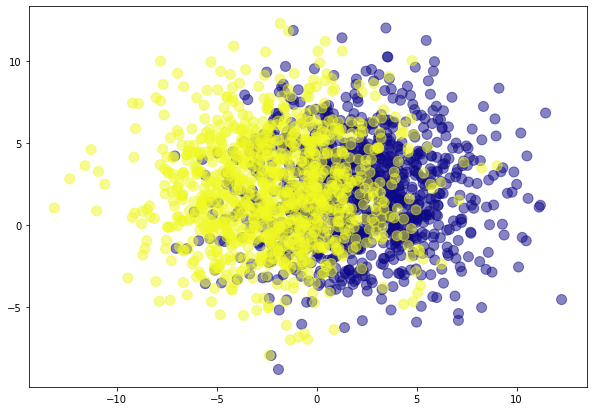

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.14762753 -1.4790219 ]
 [ 0.04005453  2.0442777 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[ 0.17412767  0.2012273   1.1752939   1.1070386 ]
 [ 0.92384696 -0.81356     0.4439045   0.36973053]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 2.1281798  -1.0565169 ]
 [-1.0406135  -0.36022672]
 [ 0.8330123  -1.995344  ]
 [ 0.06618261  0.11647865]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 683us/step - loss: 0.6007 - accuracy: 0.7000


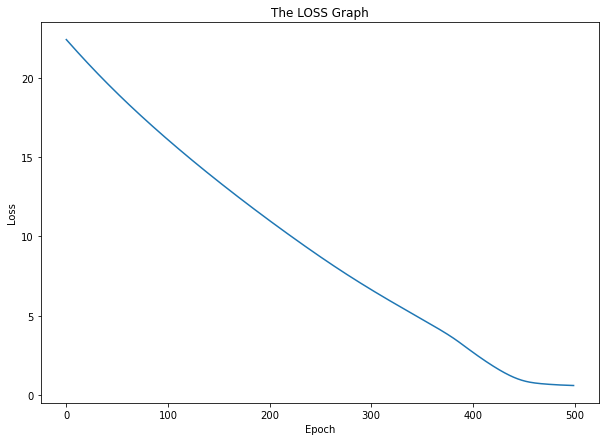

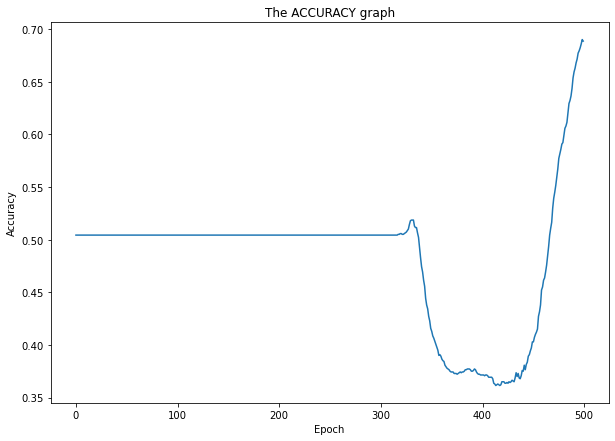

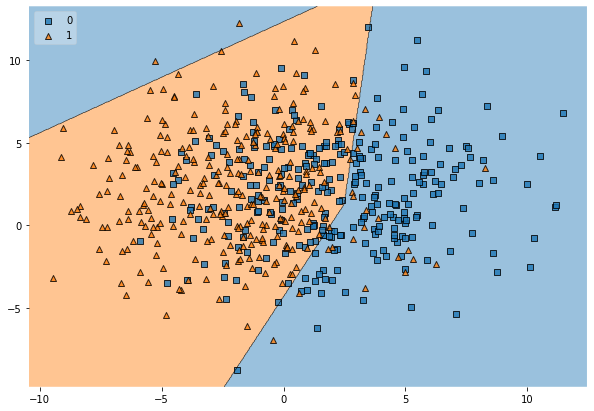

-----------------------------------------------


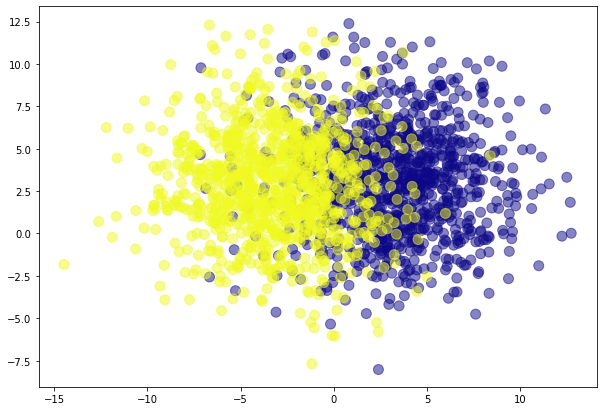

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-1.7006491   0.14044365]
 [ 1.1483933   1.6522183 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-1.5951766   1.491034   -0.26833683  0.25843433]
 [-2.5082061  -0.28057826  0.4398826   0.45473877]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[-3.1868334  -0.85727394]
 [ 0.3379097  -0.01651252]
 [-1.3825752   0.36269692]
 [-0.80053693  2.5779722 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 631us/step - loss: 0.9934 - accuracy: 0.4417


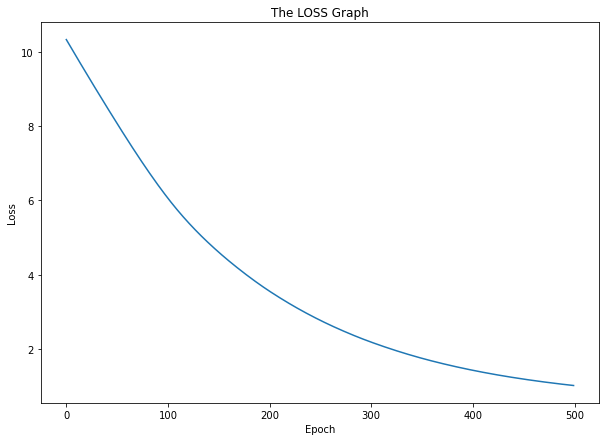

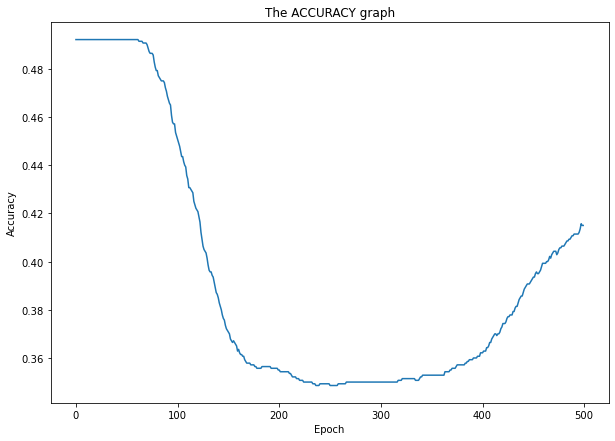

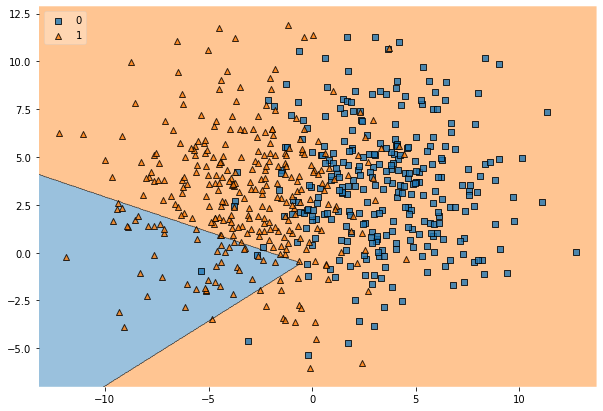

-----------------------------------------------


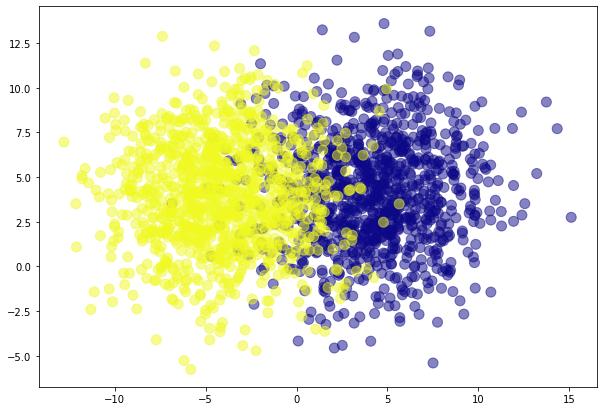

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 1.2540057  -0.10321728]
 [ 1.0569954   1.8419071 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.22290915  0.44012746  0.659951    0.82192934]
 [-0.9002668  -0.44771636 -0.33646947  1.1999512 ]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.86187106 -1.3514938 ]
 [ 0.07165916 -0.64832175]
 [ 0.5600415   1.0540656 ]
 [-0.13668624 -0.925691  ]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 682us/step - loss: 0.3076 - accuracy: 0.9000


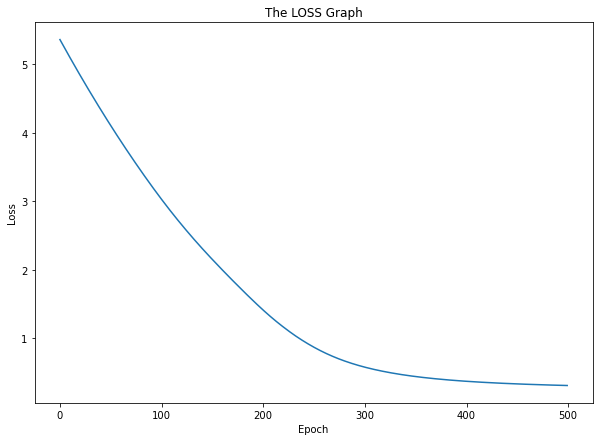

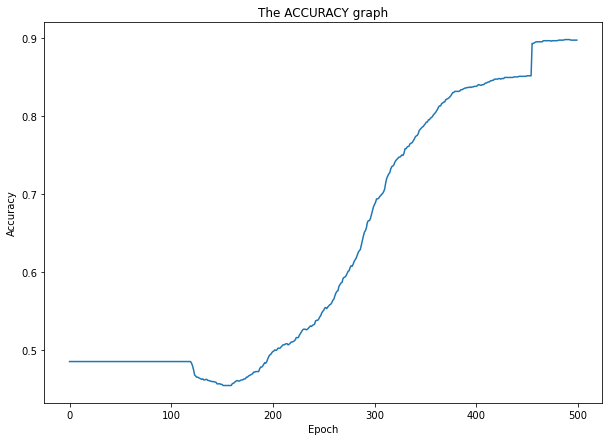

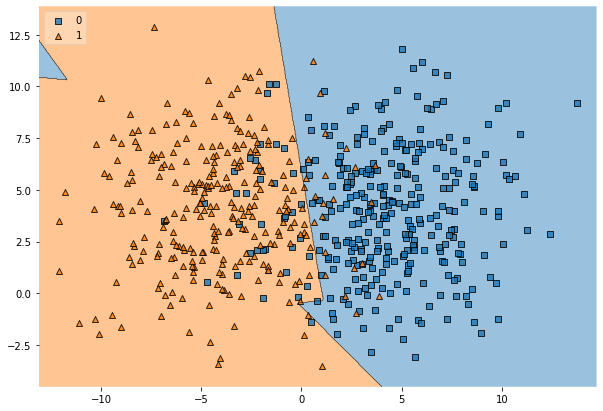

-----------------------------------------------


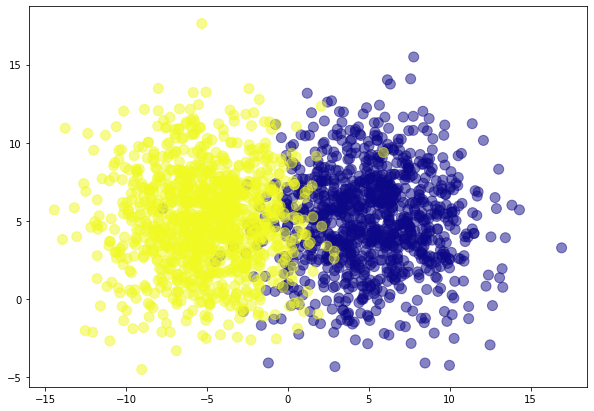

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.03349734 -0.3695653 ]
 [-0.97464687  0.39663815]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[ 1.1469665   0.9290778   1.2321582   0.0384317 ]
 [ 0.01864811 -0.44849664 -0.10479441 -0.33766988]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.21145675  1.0829421 ]
 [ 1.1135993   1.1273688 ]
 [ 0.5345672   0.7022949 ]
 [ 0.6106245  -0.2304325 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 630us/step - loss: 0.1353 - accuracy: 0.9617


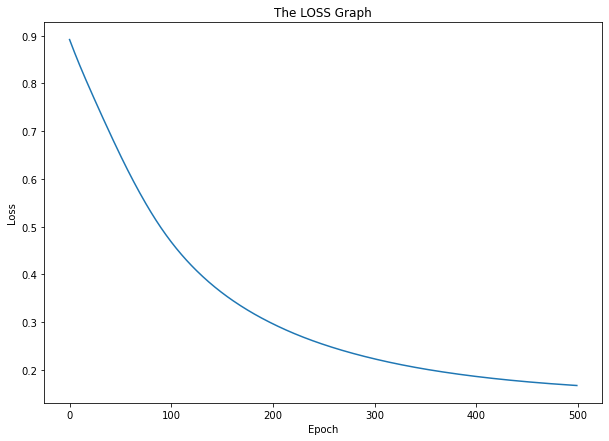

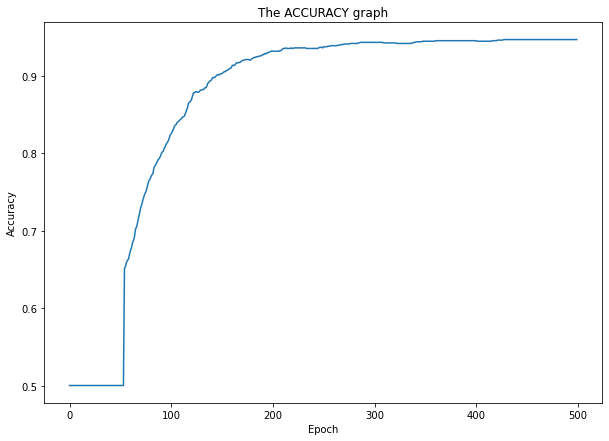

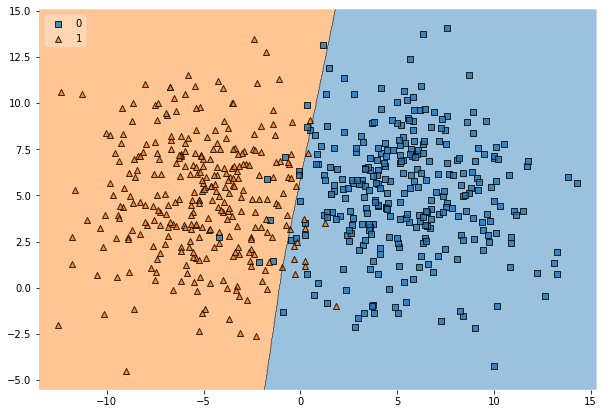

-----------------------------------------------


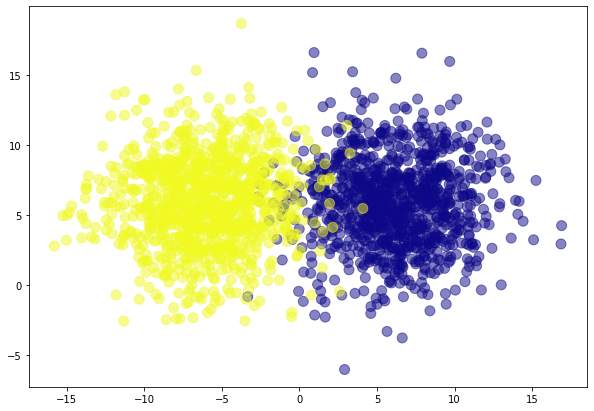

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.11884167  1.9474441 ]
 [ 0.45458713 -0.5592507 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.6863721  -0.9994495   0.33647949  0.6425242 ]
 [-0.31802896  0.33988643  1.7423947   0.19898562]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[-0.00392398 -0.36890918]
 [ 1.7471161   0.03242844]
 [ 0.22243732  0.5094215 ]
 [-0.7376236  -0.27853665]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 570us/step - loss: 0.2060 - accuracy: 0.9433


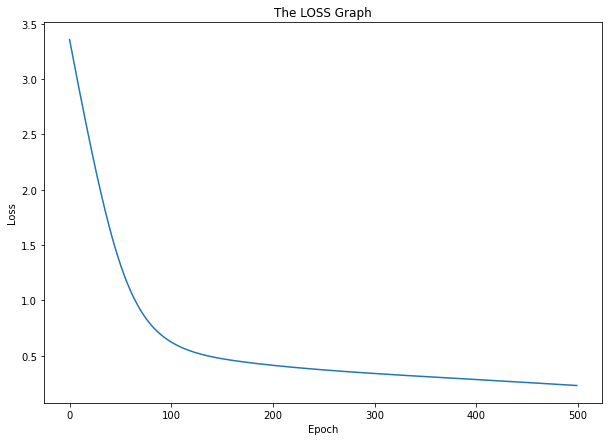

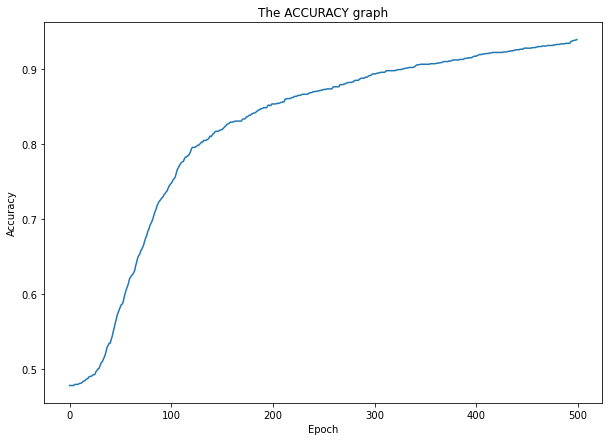

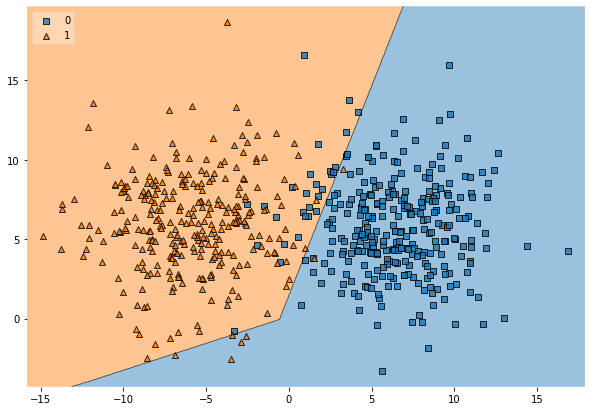

-----------------------------------------------


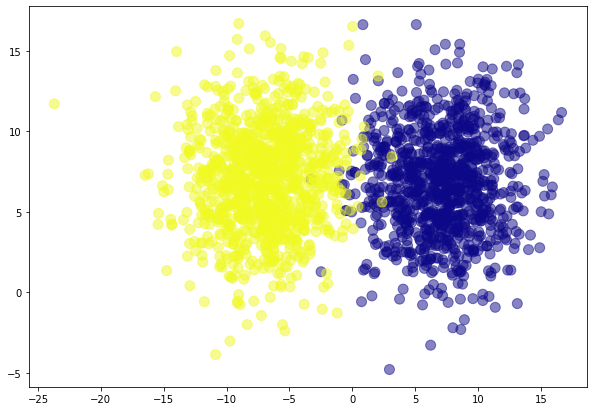

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[-0.29965064 -0.6399151 ]
 [ 0.25350565 -0.3798355 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.7461618  -0.15856726 -0.9180132  -0.21381079]
 [ 1.1021886   0.38133442  0.9755456  -0.3723019 ]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.7918193   0.12923892]
 [ 1.9616448   0.14728704]
 [ 0.7829491  -1.527131  ]
 [ 1.6223131   0.359876  ]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 735us/step - loss: 0.2488 - accuracy: 0.9650


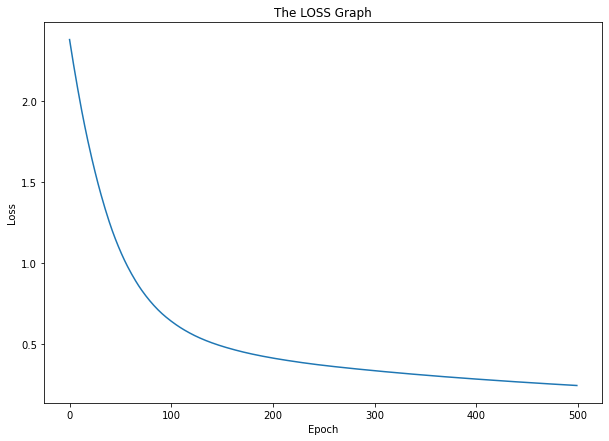

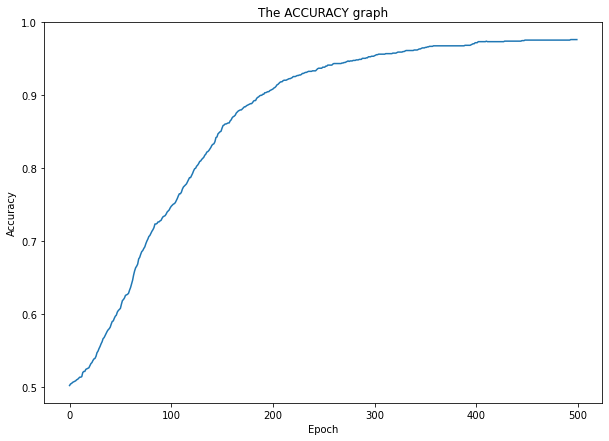

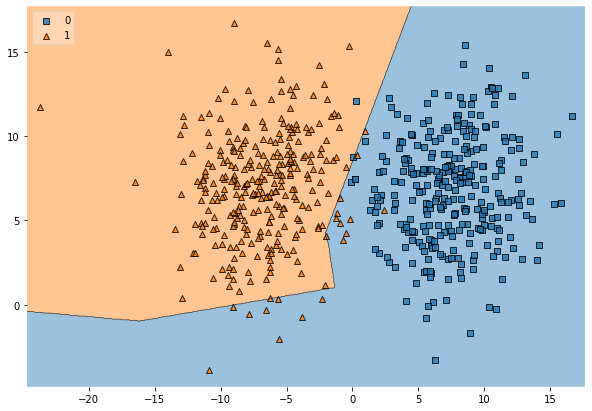

-----------------------------------------------


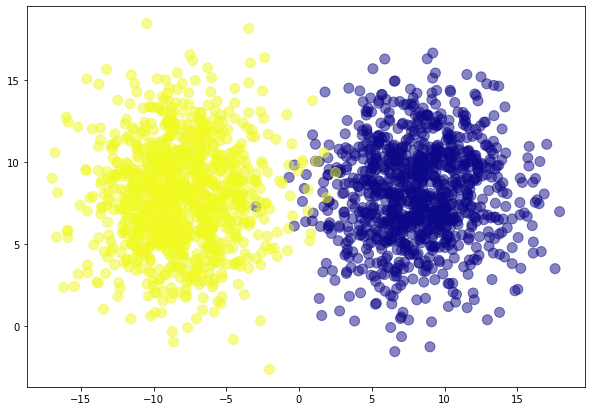

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.75532085  1.1255299 ]
 [-0.04807782 -0.62468284]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[ 0.5879993   1.3198729   1.0759777   0.0891104 ]
 [-0.41794178  0.23780538 -0.9819573  -1.211117  ]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[ 0.10212267 -1.1240423 ]
 [ 0.36441037 -0.23953852]
 [ 0.8435216   2.2451344 ]
 [-0.47750148  0.19244097]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 648us/step - loss: 0.0377 - accuracy: 0.9900


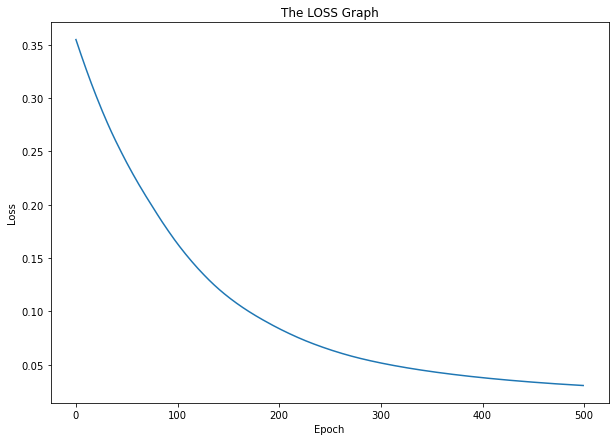

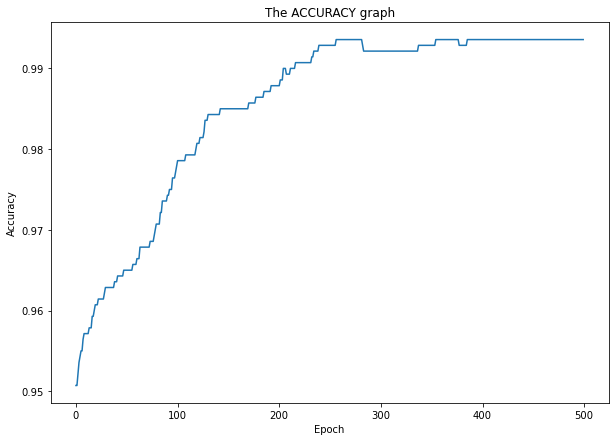

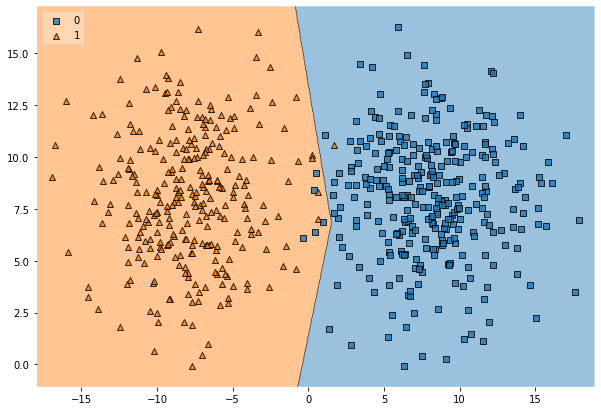

-----------------------------------------------


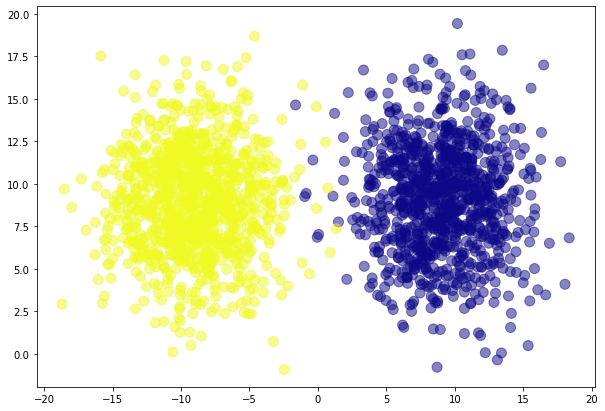

(1400, 2) (1400,)
(600, 2) (600,)
(1400, 2)
Weights and biases of the layers after setting the new weights and biases: 

dense
Weights
Shape:  (2, 2) 
 [[ 0.24970233 -0.5034995 ]
 [-0.6712273  -0.20911713]]
Bias
Shape:  (2,) 
 [1. 1.] 

dense_1
Weights
Shape:  (2, 4) 
 [[-0.15679233  1.7879037   0.6592181  -0.2605645 ]
 [ 1.4998537  -0.21429354 -0.79768085  0.16032448]]
Bias
Shape:  (4,) 
 [1. 1. 1. 1.] 

dense_2
Weights
Shape:  (4, 2) 
 [[-2.5626707   0.1234589 ]
 [ 0.0143379   0.01051682]
 [-0.27310035 -1.264621  ]
 [ 1.0085171   1.1598916 ]]
Bias
Shape:  (2,) 
 [1. 1.] 

19/19 [==============================] - 0s 591us/step - loss: 0.0142 - accuracy: 0.9933


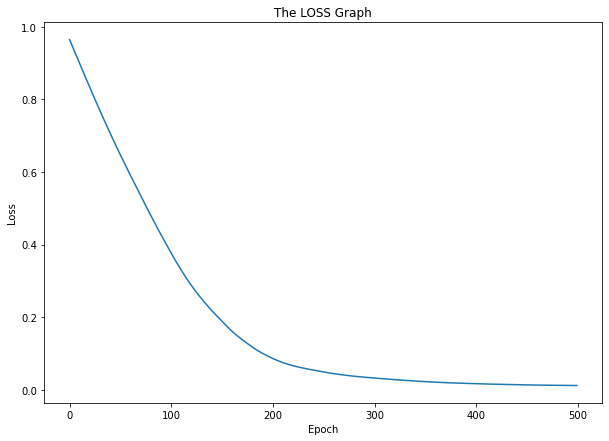

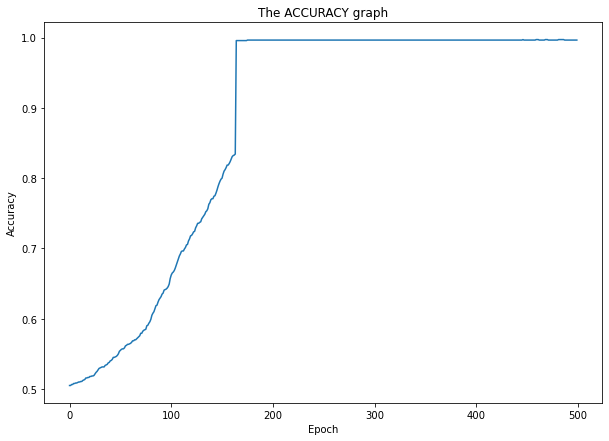

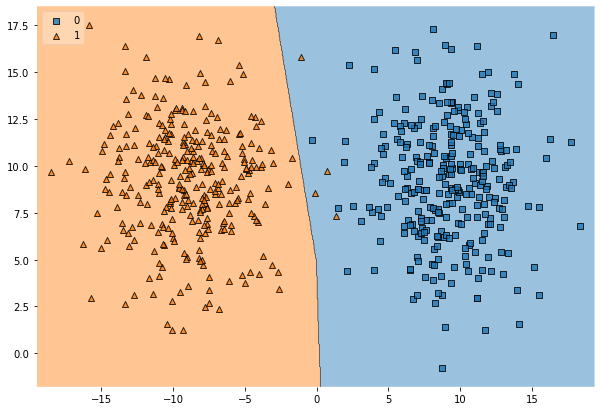

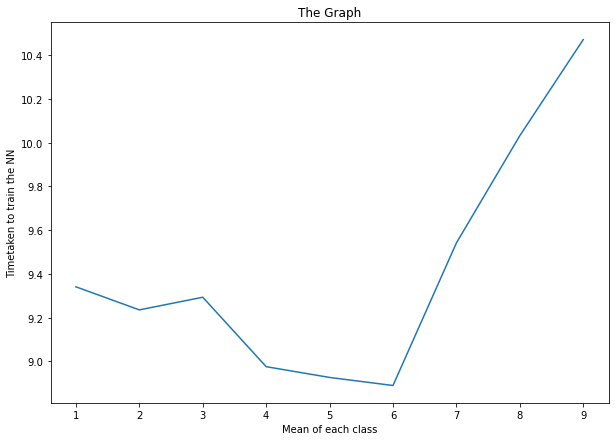

In [9]:
def main():
    
    print("****************************The Original NN*************************************")
    OldDataset()
    print("\n**************************The New NN************************************")
    TimeForNN = []
    MeanArr = []
    for i in range(1, 10):
        print("-----------------------------------------------")
        start = time.time()
        NewDataset(i)
        end = time.time()
        TimeForNN = np.append(TimeForNN,(end-start))
        MeanArr = np.append(MeanArr,i)
    plt.figure(figsize=(10,7))
    plt.plot(MeanArr, TimeForNN)
    plt.xlabel("Mean of each class")
    plt.ylabel("Timetaken to train the NN")
    plt.title("The Graph")
    plt.show()
    
if __name__ == "__main__":
    main()